In [11]:
import pandas as pd

In [12]:
file_name='Videodata.csv'
df=pd.read_csv(file_name)

In [13]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [14]:
df.shape

(32561, 15)

In [15]:
df.iloc[df["age"].idxmax()]

age                            90
 workclass                Private
 fnlwgt                     51744
 education                HS-grad
 education-num                  9
 marital-status     Never-married
 occupation         Other-service
 relationship       Not-in-family
 race                       Black
 sex                         Male
 capital-gain                   0
 capital-loss                2206
 hours-per-week                40
 native-country     United-States
 income                     <=50K
Name: 222, dtype: object

In [16]:
df.iloc[df["age"].idxmin()]

age                            17
 workclass                      ?
 fnlwgt                    304873
 education                   10th
 education-num                  6
 marital-status     Never-married
 occupation                     ?
 relationship           Own-child
 race                       White
 sex                       Female
 capital-gain               34095
 capital-loss                   0
 hours-per-week                32
 native-country     United-States
 income                     <=50K
Name: 106, dtype: object

In [17]:
df[" income"].value_counts().sort_values(ascending=True)

 income
 >50K      7841
 <=50K    24720
Name: count, dtype: int64

In [18]:
import matplotlib
matplotlib.rc("figure", figsize=(10,6))

<Axes: xlabel=' income'>

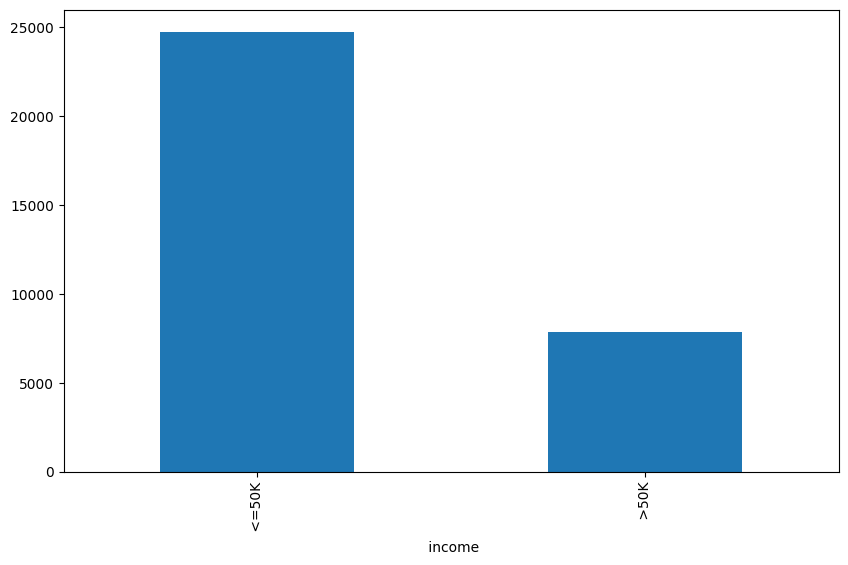

In [19]:
import matplotlib as plt
df[" income"].value_counts().plot(kind="bar")

<Axes: xlabel=' education'>

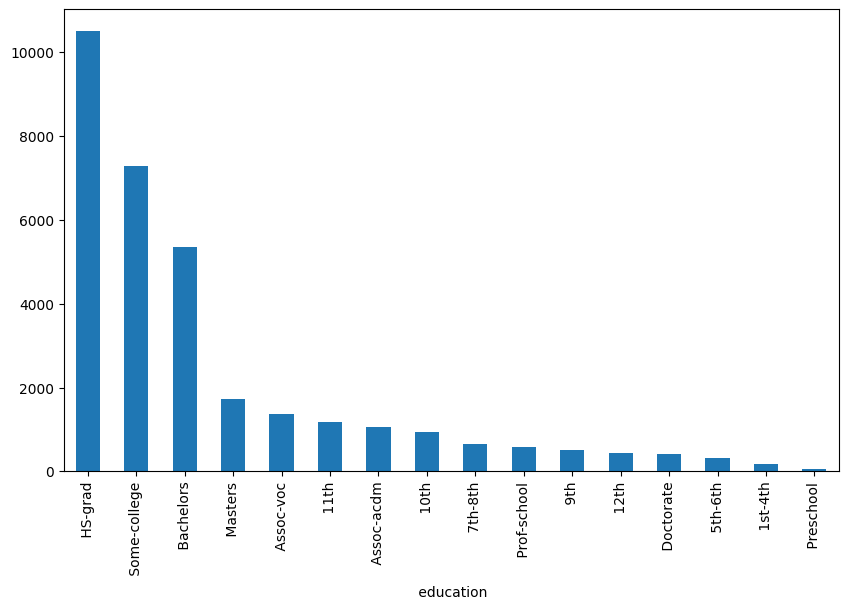

In [20]:
df[' education'].value_counts().plot(kind="bar")

In [21]:
df.columns 

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [22]:
dfNew=df[['age',' workclass', ' education', ' marital-status' ,' occupation',' hours-per-week',' native-country',' income']]
dfNew.columns=[['age',' workclass', ' education', ' marital-status' ,' occupation',' hours-per-week',' native-country',' income']]

In [23]:
dfNew.head()

,age,workclass,education,marital-status,occupation,hours-per-week,native-country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,40,Cuba,<=50K


In [24]:
dfNew.isnull().sum()

age                0
 workclass         0
 education         0
 marital-status    0
 occupation        0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [25]:

dfNew.duplicated().sum()

7226

In [26]:
dfNew = dfNew.copy()
dfNew.drop_duplicates(inplace=True)

In [27]:
dfNew.duplicated().sum()

0

In [28]:
from sklearn import preprocessing
labelencoder=preprocessing.LabelEncoder()

In [29]:
pd.options.mode.chained_assignment = None 
dfNew[' workclass']=labelencoder.fit_transform(dfNew[' workclass'])
dfNew[' education']=labelencoder.fit_transform(dfNew[' education'])
dfNew[' marital-status']=labelencoder.fit_transform(dfNew[' marital-status'])
dfNew[ ' occupation']=labelencoder.fit_transform(dfNew[' occupation'])
dfNew[' native-country']=labelencoder.fit_transform(dfNew[' native-country'])
dfNew[' income']=labelencoder.fit_transform(dfNew[' income'])

C:\Users\samar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\samar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\samar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

<Axes: xlabel='None', ylabel='None'>

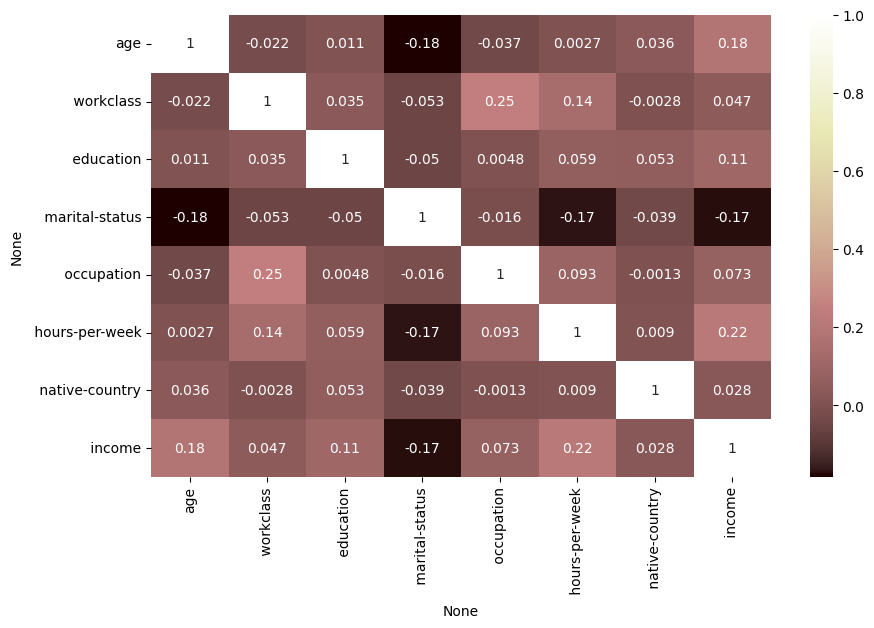

In [30]:
import seaborn as sns
sns.heatmap(dfNew.corr(),annot=True, cmap='pink')

In [33]:
x=dfNew[['age',' workclass', ' education', ' marital-status' ,' occupation',' hours-per-week',' native-country']]
y=dfNew[' income']


In [34]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test=train_test_split(x,y, test_size=0.30)

In [35]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.fit_transform(x_test)

In [36]:
import numpy as np
from sklearn.metrics import accuracy_score
def modelresults(predictions):
    print("accuracy score is  :{}".format(accuracy_score(y_test,predictions)))

In [37]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(scaled_x_train,y_train)

C:\Users\samar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [38]:
log_prediciton=log_model.predict(scaled_x_test)
modelresults(log_prediciton)

accuracy score is  :0.7433232469411919


In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
knn=KNeighborsClassifier()
k_values = list(range(1,30))
pipe = Pipeline(steps=[("knn", knn)])
param_grid = {"knn__n_neighbors": k_values}
cv_classifier=GridSearchCV(pipe,param_grid,cv=5,scoring="accuracy")
cv_classifier.fit(scaled_x_train,y_train)
print(cv_classifier.best_params_)


C:\Users\samar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\samar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\samar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

{'knn__n_neighbors': 29}


C:\Users\samar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [40]:
pred_gridknn=cv_classifier.predict(scaled_x_test)
modelresults(pred_gridknn)

accuracy score is  :0.7971319563215367


In [42]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svrmodel=SVR()
param_gridsvr={'C':[0.1,0.5,1],'kernel':['linear','rbf','poly']}
gridsvr=GridSearchCV(svrmodel,param_gridsvr)
gridsvr.fit(scaled_x_train,y_train)

C:\Users\samar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\samar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\samar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [ ]:
predegridsvr=gridsvr.predict(scaled_x_test)#Support Vector regression 
modelresults(predegridsvr)

In [45]:
from sklearn.ensemble import RandomForestRegressor
rfmodel=RandomForestRegressor()
param_gridrfr={'bootstrap':[True,False],'oob_score':[True,False],'max_features':[2,3],'n_estimators':[32,64,128]}
gridrfr=GridSearchCV(rfmodel,param_gridrfr)
gridrfr.fit(scaled_x_train,y_train.values.ravel())
print(gridrfr.best_params_)

C:\Users\samar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\samar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\samar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-pac

{'bootstrap': True, 'max_features': 2, 'n_estimators': 128, 'oob_score': False}


In [ ]:
gridrfrp=gridrfr.predict(scaled_x_test)
modelresults(gridrfrp)

In [47]:
customerN=np.array([40,3,10,2,6,40,36])

In [49]:
def pred(customer):
    predicitons= cv_classifier.predict(customer.reshape(1,-1))
    if predicitons == 0:
        return "Bellow or equal to 50k"
    else:
        return "more than 50k"

In [50]:
print("this customer income is : {}".format(pred(customerN)))

this customer income is : Bellow or equal to 50k
